In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

In [7]:
os.chdir("/content/drive/My Drive/DS")
files = glob.glob('data*.csv')


In [8]:
# FUNCTION TO TRANSFORM EVERY csv FILE DATA AND ADD TO NEW DATAFRAME

def transformData(temp):
    rows = temp.shape[0]
    cols = temp.shape[1]
  
    # Array to create every row of final dataframe to use as input
    rowValues = []
    for i in range(rows):
        for j in range(cols):
            val = temp.iloc[i,j]
            # Adding every non-null value to rowValue
            if val != None and type(val) ==  str:
                rowValues.append(val)
                
    return rowValues
  

In [9]:
# FUNCTION TO PREPROCESS DATA AND TRANSFORM IT INTO ROW COLUMN FORMAT

def PreProcessData(df):   
    # Removing special characters from data
    df=df.replace('\[','',regex=True).astype(str)
    df=df.replace('\]','',regex=True).astype(str)
    df.columns = ["Values"]
    
    # Splitting every matrix value into separate column of dataframe
    temp = pd.DataFrame(df['Values'].str.split(' ').tolist())
    temp = temp.replace('',np.nan)
    # Generating each row of final dataframe
    row = transformData(temp)
    return row
    

In [10]:
# CODE FOR CREATING THE FINAL DATAFRAME TO USE AS INPUT TO OUR MODEL

data = pd.DataFrame()
optimizedVals = []
for file in files:
    df = pd.read_csv(file)
    
    # Storing optimized values from all files
    optimizedVals.append(df.columns[0].split(':')[1])
    
    row = PreProcessData(df)
    row = pd.Series(row)
    #Adding every generated row into final dataframe
    data = data.append(row, ignore_index=True)
    print(data)
    
# Adding the class label column i.e Optimized Value for prediction    
data = data.assign(OptimVal = optimizedVals)
    

Streaming output truncated to the last 5000 lines.
[643 rows x 2500 columns]
    0    1    2    3    4    5    6     ... 2493 2494 2495 2496 2497 2498 2499
0    156  499  284   25  300   40  346  ...  420  295  327   68  271  302   47
1    343  489  349  305  372  350   40  ...  340  241  340  391   31  282  340
2    100  451  272  298  496  351   86  ...  393  242   51  156   43  418  488
3     36   33  283  289  440  117  173  ...  207  127   97  220  375  467   68
4    161  254  301  283  421  447  198  ...  170  491  118  455  232  185  208
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
639  201  211  444   87  311  314  341  ...  390  445  411  377  185  121  477
640  309  250  488  241   92   99  407  ...  201  197  489  179  241  452  485
641  368  267  194  156  220  350   71  ...   54  415  267  183  367  323   46
642  443  280  188  398  204  108  380  ...  386  213  442  438  296  157  414
643  233  333  377  178  464   27   52  ...  156  269 

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,OptimVal
0,156,499,284,25,300,40,346,108,190,458,358,320,124,93,283,103,64,273,449,225,487,54,497,420,207,204,175,423,301,20,306,139,354,36,326,79,345,435,295,443,...,316,30,236,293,230,205,484,77,89,366,240,419,225,325,136,214,24,85,472,478,470,371,154,410,374,94,395,468,25,315,348,312,420,295,327,68,271,302,47,1606.0
1,343,489,349,305,372,350,40,133,126,328,312,162,207,317,27,396,45,233,159,485,64,328,181,135,63,367,381,298,300,222,429,430,415,204,233,304,448,72,274,37,...,439,486,47,152,403,430,352,109,111,200,222,224,440,253,484,497,114,186,332,495,307,416,299,359,236,252,77,449,225,27,371,46,340,241,340,391,31,282,340,1722.0
2,100,451,272,298,496,351,86,369,122,372,446,205,243,386,463,404,459,340,415,418,252,234,288,432,27,145,338,129,104,308,116,279,323,131,31,431,314,364,409,21,...,224,359,210,224,156,348,499,52,99,21,47,184,179,352,470,167,202,216,265,402,160,281,225,95,225,78,22,161,208,210,432,126,393,242,51,156,43,418,488,1686.0
3,36,33,283,289,440,117,173,450,235,125,274,180,188,311,455,143,361,265,72,306,207,207,349,393,213,106,66,418,451,55,497,394,100,361,302,272,251,151,127,295,...,23,396,198,460,412,180,213,483,152,152,222,43,297,144,140,48,483,339,266,334,433,50,497,48,22,400,227,479,30,260,352,494,207,127,97,220,375,467,68,1784.0
4,161,254,301,283,421,447,198,116,338,333,182,195,417,133,421,161,193,45,439,474,393,243,317,23,172,443,346,177,262,361,467,343,168,124,276,221,73,345,210,401,...,258,485,70,114,45,173,437,214,251,368,427,341,72,360,296,433,473,208,112,212,422,85,424,401,499,338,82,334,23,421,381,178,170,491,118,455,232,185,208,1806.0


In [33]:
#CREATING X and Y VARIABLES

X = data[data.columns[0:2499]].values
y = data["OptimVal"].values
#Converting string to numeric value
y = pd.to_numeric(y)

In [34]:
# FUNCTION FOR SCALING AND NORMALIZING THE DATA USING MIN-MAX SCALER

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Normalizing data and creating the splits
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)


In [14]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [15]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, BatchNormalization, Dropout, Flatten, MaxPooling1D, BatchNormalization

In [21]:
# ANN MODEL CREATION

modelANN = Sequential()

modelANN.add(Dense(100,activation='relu',input_dim=X.shape[1]))
modelANN.add(Dense(75,activation='relu'))
modelANN.add(Dense(50,activation='relu'))
modelANN.add(Dense(25,activation='relu'))

modelANN.add(Dense(1))

# Using adam as optimizer and mean squared error as loss function
modelANN.compile(optimizer='adam',loss='mse')

In [22]:
# CNN MODEL CREATION

modelCNN = Sequential()

# Model with 2 convolution layers and 3 fully connected layers
modelCNN.add(Conv1D(filters=100,kernel_size=3,activation='relu',input_shape = (X_train.shape[1],1)))
modelCNN.add(BatchNormalization())
modelCNN.add(MaxPooling1D(pool_size=2))
modelCNN.add(Conv1D(filters=50, kernel_size=3, activation='relu'))
modelCNN.add(BatchNormalization())
modelCNN.add(MaxPooling1D(pool_size=2))
modelCNN.add(Flatten())
modelCNN.add(Dense(100, activation='relu'))
modelCNN.add(Dense(50, activation='relu'))
modelCNN.add(Dense(50, activation='relu'))
modelCNN.add(Dense(1))

# Using adam as optimizer and mean squared error as loss function
modelCNN.compile(optimizer = 'adam', loss = 'mse')


In [35]:
# USING CROSS VALIDATION FOR TRAINING THE ANN MODEL

from sklearn.model_selection import KFold

# Cross validation with 3 folds
crossVal = KFold(n_splits=3, shuffle = True , random_state=10)

# Training parameters are 200 epochs and 64 batch size
for trainidx, testidx in crossVal.split(X_train,y_train):
  X_train, X_validation = X[trainidx], X[testidx]
  y_train, y_validation = y[trainidx], y[testidx]
  modelANN.fit(X_train, y_train, validation_data = (X_validation, y_validation),epochs=200,batch_size=64)
  predictANN = modelANN.predict(X_validation)


Epoch 1/200
8/8 [==============================] - 0s 14ms/step - loss: 188.8812 - val_loss: 277.4897
Epoch 2/200
8/8 [==============================] - 0s 6ms/step - loss: 204.3008 - val_loss: 306.7728
Epoch 3/200
8/8 [==============================] - 0s 6ms/step - loss: 197.0115 - val_loss: 237.9093
Epoch 4/200
8/8 [==============================] - 0s 6ms/step - loss: 146.1507 - val_loss: 231.1209
Epoch 5/200
8/8 [==============================] - 0s 6ms/step - loss: 100.0242 - val_loss: 238.5302
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 96.3989 - val_loss: 238.5860
Epoch 7/200
8/8 [==============================] - 0s 6ms/step - loss: 76.9336 - val_loss: 233.7216
Epoch 8/200
8/8 [==============================] - 0s 6ms/step - loss: 64.2160 - val_loss: 306.6054
Epoch 9/200
8/8 [==============================] - 0s 7ms/step - loss: 79.9893 - val_loss: 246.4618
Epoch 10/200
8/8 [==============================] - 0s 6ms/step - loss: 58.8390 - val_loss: 26

In [36]:
# Expanding input dimension to match with the CNN model input
X = np.expand_dims(X, axis=2)

In [37]:
# USING CROSS VALIDATION FOR TRAINING THE ANN MODEL

from sklearn.model_selection import KFold

# Cross validation with 3 folds
crossVal = KFold(n_splits=3, shuffle = True , random_state=101)

# Training parameters are 100 epochs and 128 batch size
for trainidx, testidx in crossVal.split(X_train,y_train):
  X_train, X_validation = X[trainidx], X[testidx]
  y_train, y_validation = y[trainidx], y[testidx]
  history = modelCNN.fit(X_train, y_train, 
                        validation_data = (X_validation, y_validation), 
                        epochs=100, 
                        batch_size=128)
  predictCNN = modelCNN.predict(X_validation)


Epoch 1/100
3/3 [==============================] - 0s 98ms/step - loss: 54.0802 - val_loss: 2136.8611
Epoch 2/100
3/3 [==============================] - 0s 61ms/step - loss: 137.1531 - val_loss: 1848.5399
Epoch 3/100
3/3 [==============================] - 0s 61ms/step - loss: 144.6093 - val_loss: 846.6053
Epoch 4/100
3/3 [==============================] - 0s 60ms/step - loss: 146.7229 - val_loss: 257.3387
Epoch 5/100
3/3 [==============================] - 0s 61ms/step - loss: 48.2816 - val_loss: 305.8644
Epoch 6/100
3/3 [==============================] - 0s 61ms/step - loss: 31.7596 - val_loss: 25.5661
Epoch 7/100
3/3 [==============================] - 0s 60ms/step - loss: 37.8857 - val_loss: 87.2819
Epoch 8/100
3/3 [==============================] - 0s 60ms/step - loss: 40.2959 - val_loss: 25.7520
Epoch 9/100
3/3 [==============================] - 0s 61ms/step - loss: 11.4870 - val_loss: 1164.3682
Epoch 10/100
3/3 [==============================] - 0s 60ms/step - loss: 31.0154 - val_l

In [41]:
# LOADING THE SAVED MODEL

from tensorflow.keras.models import load_model
modelANN = load_model('/content/drive/My Drive/ModelANN_1102484.h5')
modelCNN = load_model('/content/drive/My Drive/ModelCNN_1102484.h5')

In [43]:
# ****** Uncomment the below chunk if the prediction chunks throws error ****** #

# X = data[data.columns[0:2499]].values
# y = data["OptimVal"].values
# y = pd.to_numeric(y)
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# ***************************************************************************** #

In [44]:
# PREDICTION WITH THE TRAINED/SAVED MODEL

predictionsANN = modelANN.predict(X_test)

X_test = np.expand_dims(X_test, axis=2)
predictionsCNN = modelCNN.predict(X_test)

In [39]:
# FUNCTION TO CALCULATE THE ERROR VALUE FOR BOTH THE MODELS

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

print("Mean Absolute Error for ANN:",mean_absolute_error(y_test,predictionsANN))
print("Root Mean Square Error for ANN:",np.sqrt(mean_squared_error(y_test,predictionsANN)))
print("Mean Absolute Error for CNN:",mean_absolute_error(y_test,predictionsCNN))
print("Root Mean Square Error for CNN:",np.sqrt(mean_squared_error(y_test,predictionsCNN)))

Mean Absolute Error for ANN: 24.99974365234375
Root Mean Square Error for ANN: 53.66251915638238
Mean Absolute Error for CNN: 31.778963623046874
Root Mean Square Error for CNN: 45.753762449313044


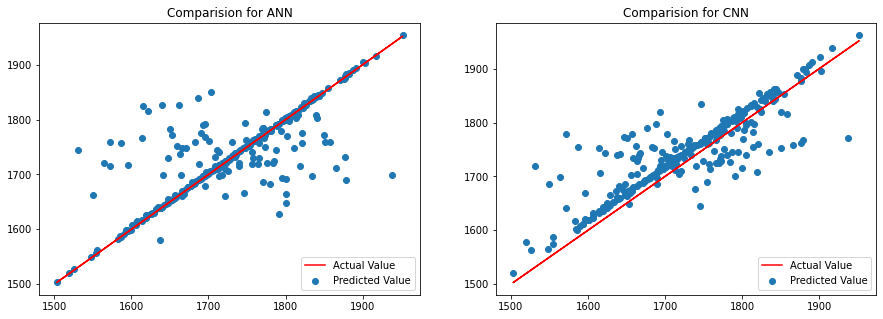

In [40]:
# FUNCTION FOR COMPARISION FOR PREDICTIONS USING ANN AND CNN

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

# Model predictions
plt.scatter(y_test,predictionsANN)
# Perfect predictions
plt.plot(y_test,y_test,'red')
plt.title('Comparision for ANN')
plt.legend(['Actual Value','Predicted Value'], loc='lower right')

plt.subplot(1,2,2)
# Model predictions
plt.scatter(y_test,predictionsCNN)
#Perfect predictions
plt.plot(y_test,y_test,'red')
plt.title('Comparision for CNN')
plt.legend(['Actual Value','Predicted Value'], loc='lower right')
plt.show()


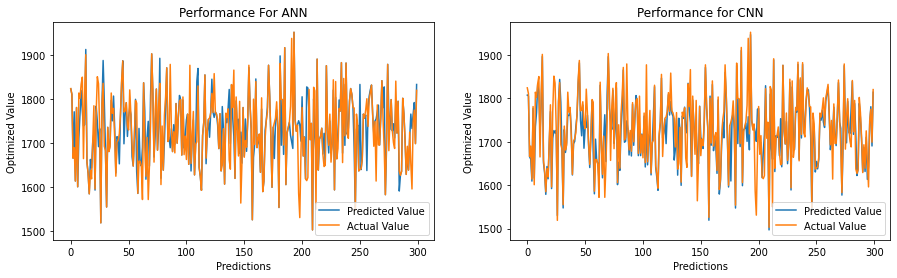

In [20]:
# FUNCTION FOR COMPARISION THE PERFORMANCE OF PREDICTIONS USING ANN AND CNN

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

plt.plot(predictionsANN)
plt.plot(y_test)
plt.title('Performance For ANN')
plt.ylabel('Optimized Value')
plt.xlabel('Predictions')
plt.legend(['Predicted Value', 'Actual Value'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(predictionsCNN)
plt.plot(y_test)
plt.title('Performance for CNN')
plt.ylabel('Optimized Value')
plt.xlabel('Predictions')
plt.legend(['Predicted Value', 'Actual Value'], loc='lower right')
plt.show()

In [ ]:
# ACCORDING TO THE EXPERIMENT, CNN PERFORMED BETTER COMPARED TO ANN
# RMSE FOR CNN : 43.92
# RMSE FOR ANN : 53.88